In [21]:
from experiments.cifar10.evaluate_features_cifar10 import load_local_sae_and_model
from experiments.cifar10.train_sae_cifar10 import CIFAR10_SAE_CONFIG
from vit_prisma.utils.data_utils.cifar.cifar_10_utils import load_cifar_10
from vit_prisma.utils.constants import DATA_DIR
from experiments.utils.visualise import plot_image
import torch

n_tokens_per_buffer (millions): 0.0416
Lower bound: n_contexts_per_buffer (millions): 0.00064
Total training steps: 25390
Total training images: 40000
Total wandb updates: 25390
Expansion factor: 16
n_tokens_per_feature_sampling_window (millions): 66.56
n_tokens_per_dead_feature_window (millions): 332.8
Using Ghost Grads.
We will reset the sparsity calculation 25 times.
Number tokens in sparsity calculation window: 1.02e+06
Gradient clipping with max_norm=1.0
Using SAE initialization method: encoder_transpose_decoder
n_tokens_per_buffer (millions): 0.0416
Lower bound: n_contexts_per_buffer (millions): 0.00064
Total training steps: 30468
Total training images: 48000
Total wandb updates: 30468
Expansion factor: 16
n_tokens_per_feature_sampling_window (millions): 66.56
n_tokens_per_dead_feature_window (millions): 332.8
Using Ghost Grads.
We will reset the sparsity calculation 30 times.
Number tokens in sparsity calculation window: 1.02e+06
Gradient clipping with max_norm=1.0
Using SAE ini

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
train_data, val_data, _ = load_cifar_10(DATA_DIR / "cifar", augmentation=False)
train_data_visualise, val_data_visualise, _ = load_cifar_10(DATA_DIR / "cifar", augmentation=False, visualisation=True, image_size=500)

Files already downloaded and verified
Files already downloaded and verified
There are 40000 samples in the train dataset
There are 10000 samples in the validation dataset
There are 10000 samples in the test dataset
Files already downloaded and verified
Files already downloaded and verified
There are 40000 samples in the train dataset
There are 10000 samples in the validation dataset
There are 10000 samples in the test dataset


In [13]:
print(torch.max(train_data[0][0]))
print(torch.min(train_data[0][0]))

tensor(0.8570)
tensor(0.0060)


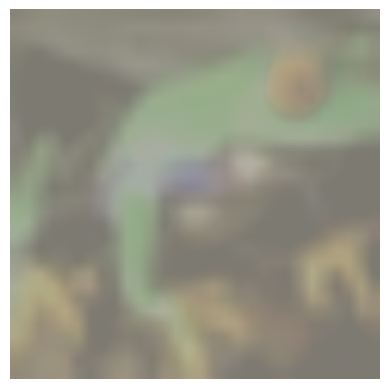

In [8]:
plot_image(train_data[0][0])

In [18]:
print(torch.max(train_data_visualise[0][0]))
print(torch.min(train_data_visualise[0][0]))
print(train_data_visualise[0][0].shape)

tensor(1.9053)
tensor(-2.4206)
torch.Size([3, 500, 500])


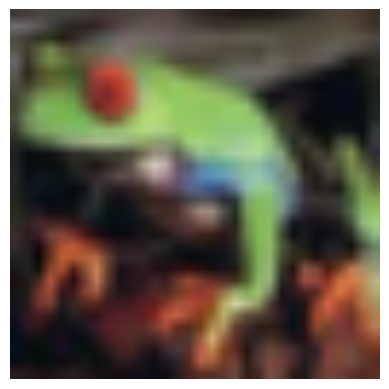

In [17]:
plot_image(train_data_visualise[0][0])

In [22]:
sae_cfg = CIFAR10_SAE_CONFIG
sae_name = "f16def25-local-cifar10-clean-expansion-16-layer-6/n_images_400005.pt"
sae_cfg.sae_path = sae_cfg.checkpoint_path + f"/{sae_name}"
sparse_autoencoder, model = load_local_sae_and_model(
    sae_cfg=sae_cfg,
)

Loading SAE from /Users/edward/github/mechanistic_interpretability/models/sae/cifar10/checkpoints/clean-model-clean-data/f16def25-local-cifar10-clean-expansion-16-layer-6/n_images_400005.pt...
Loading from: /Users/edward/github/mechanistic_interpretability/models/sae/cifar10/checkpoints/clean-model-clean-data/f16def25-local-cifar10-clean-expansion-16-layer-6/n_images_400005.pt
n_tokens_per_buffer (millions): 0.032
Lower bound: n_contexts_per_buffer (millions): 0.00064
Total training steps: 15869
Total training images: 1300000
Total wandb updates: 158
Expansion factor: 16
n_tokens_per_feature_sampling_window (millions): 204.8
n_tokens_per_dead_feature_window (millions): 1024.0
Using Ghost Grads.
We will reset the sparsity calculation 15 times.
Number tokens in sparsity calculation window: 4.10e+06
Gradient clipping with max_norm=1.0
Using SAE initialization method: encoder_transpose_decoder
Loaded config: VisionModelSAERunnerConfig(model_class_name='HookedViT', model_name='local/cifar10

AttributeError: 'VisionModelSAERunnerConfig' object has no attribute 'architecture'